In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [3]:
df=pd.read_csv("./DATA/windowed_features.csv")
df.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


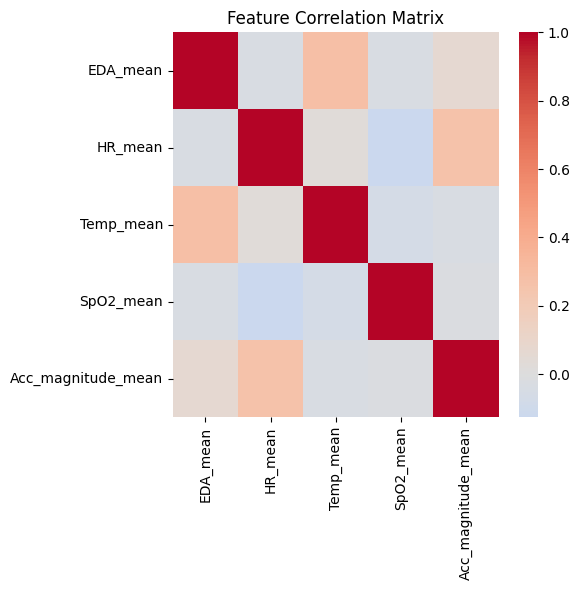

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(df)

# Add labels to the DataFrame
df['cluster'] = cluster_labels


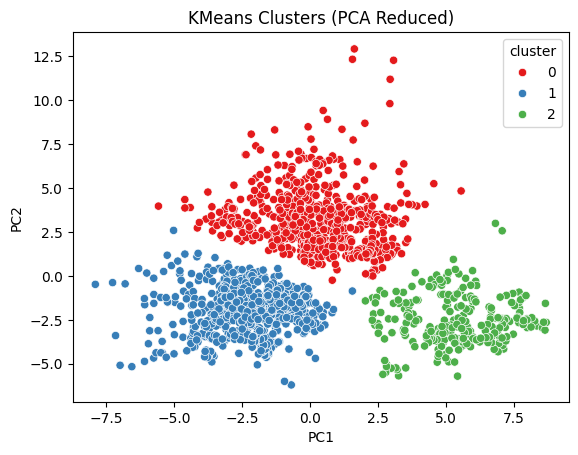

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
df['PC1'] = reduced[:, 0]
df['PC2'] = reduced[:, 1]

sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('KMeans Clusters (PCA Reduced)')
plt.show()


In [37]:
df['cluster'].unique()

array([1, 0, 2], dtype=int32)

In [35]:
df.tail()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean,cluster,PC1,PC2
1531,-0.589152,-1.001251,-0.060493,0.584019,0.331688,1,-2.143310,-2.455216
1532,-0.589294,-0.792090,0.048046,0.817485,0.316233,1,-2.004824,-2.290016
1533,-0.590622,-0.914088,0.135747,0.739661,0.296245,1,-1.899221,-2.482720
1534,-0.608860,-0.591655,0.210908,0.525667,-0.107876,1,-1.786680,-1.979911
1535,-0.602300,-0.210393,0.273526,0.175493,-0.356704,1,-1.540194,-1.117459


In [28]:
df2=df.copy()

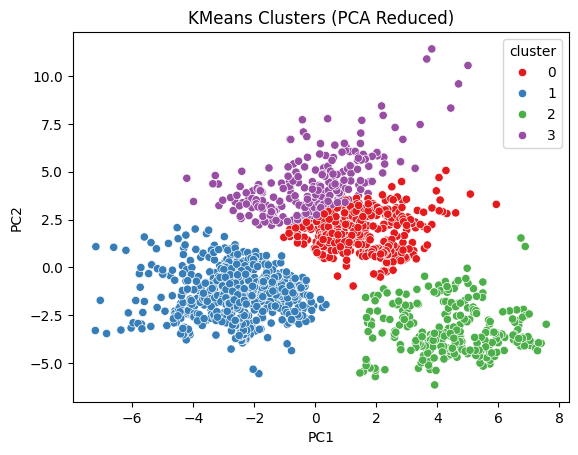

In [29]:
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(df2)

# Add labels to the DataFrame
df2['cluster'] = cluster_labels
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df2)
df2['PC1'] = reduced[:, 0]
df2['PC2'] = reduced[:, 1]

sns.scatterplot(data=df2, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('KMeans Clusters (PCA Reduced)')
plt.show()



In [34]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Use the scaled features and cluster labels
sil_score = silhouette_score(df, cluster_labels)
db_score = davies_bouldin_score(df, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


Silhouette Score: 0.4884
Davies-Bouldin Score: 0.7516


In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Use the scaled features and cluster labels
sil_score = silhouette_score(df2, cluster_labels)
db_score = davies_bouldin_score(df2, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


Silhouette Score: 0.4592
Davies-Bouldin Score: 0.8451


In [41]:
df2.head(30)

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean,cluster,PC1,PC2
0,-0.782714,0.395262,-1.045836,0.370070,0.365992,1,-2.628829,1.186501
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516,1,-2.557960,0.321198
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603,1,-3.365472,-0.933726
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413,1,-2.889140,-0.428731
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821,1,-2.842927,-0.657775
5,-0.780682,-0.500164,-0.206613,-0.174653,-0.517984,1,-2.685190,-0.733283
6,-0.780682,-0.225656,-0.114738,-0.213562,-0.516875,1,-2.384490,-0.262497
7,-0.780541,-0.341120,-0.060448,0.039345,-0.488137,1,-2.486738,-0.666613
8,-0.780541,-0.105823,0.039729,0.039345,-0.413445,1,-2.186640,-0.247407
9,-0.780306,-0.310628,0.073124,0.039345,-0.450490,1,-2.284959,-0.641154


In [40]:
df2['cluster'].unique()

array([1, 0, 3, 2], dtype=int32)

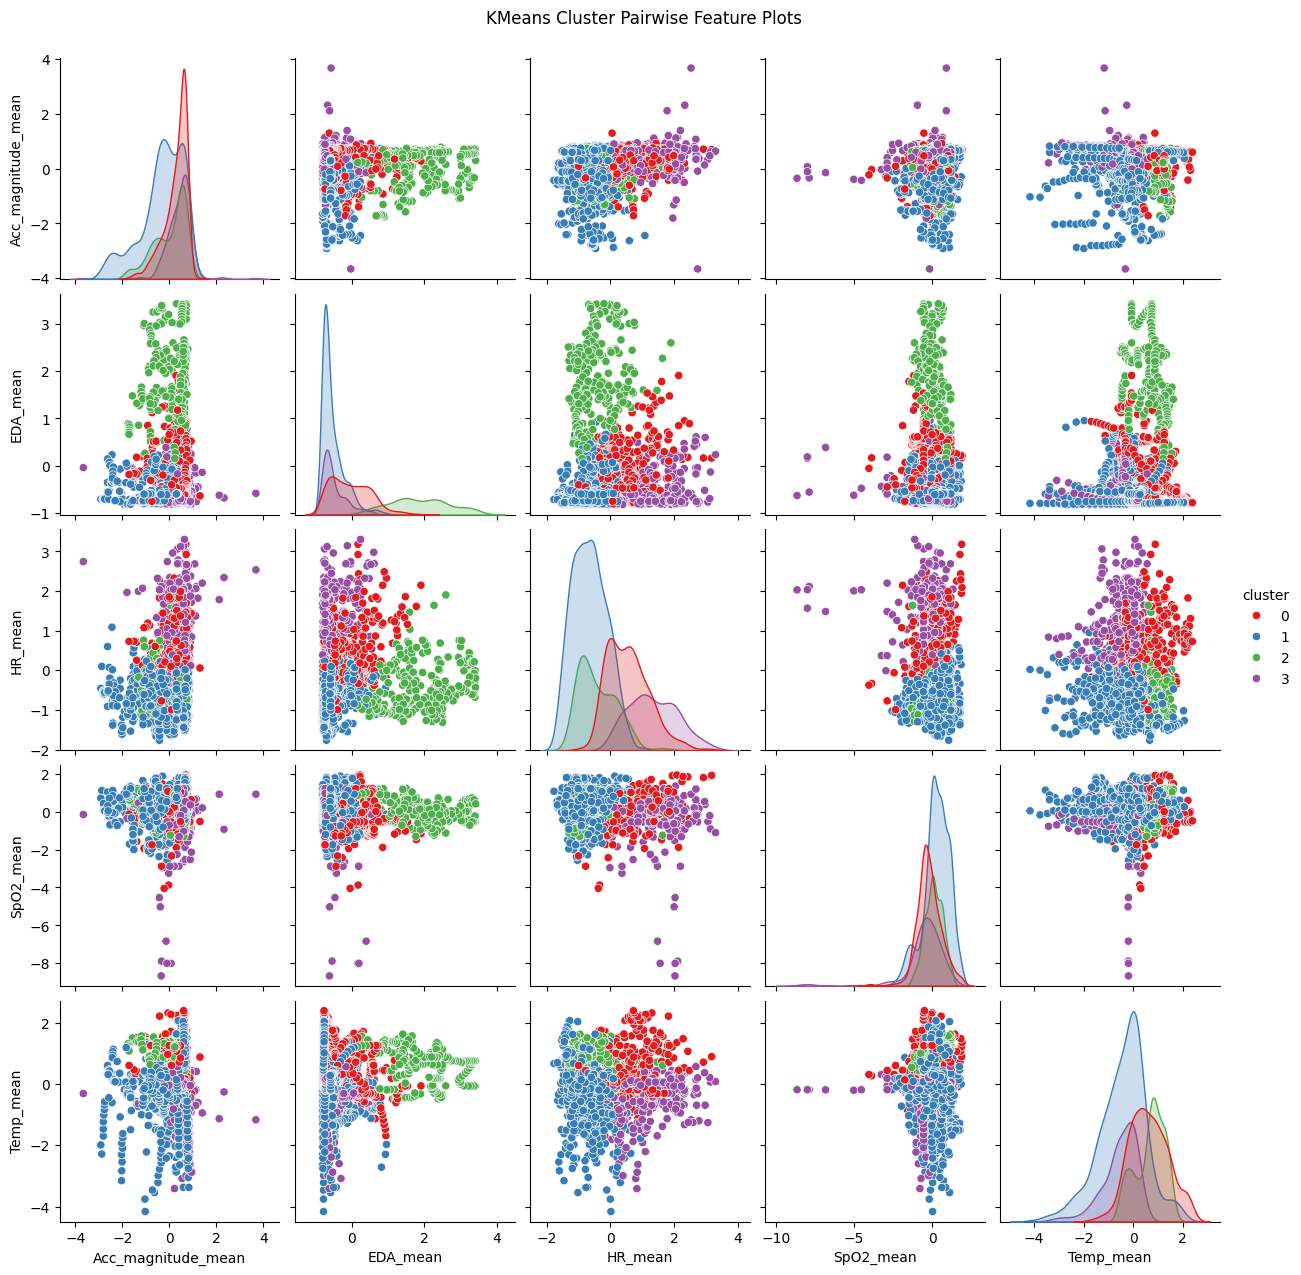

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'cluster' column is in your DataFrame
# Select only numerical features + cluster
features = df2.columns.difference(['cluster', 'PC1', 'PC2'])  # exclude PCA columns if present
plot_df = df2[features.tolist() + ['cluster']]

# Plot all pairwise combinations
sns.pairplot(plot_df, hue='cluster', palette='Set1', diag_kind='kde')
plt.suptitle('KMeans Cluster Pairwise Feature Plots', y=1.02)
plt.show()
